- Load Libraries (5 min)
> - google and write a couple of words about what each library is usful for?
> - xample: Pandas: data manipulation and analysis \\
> - which line is a pachage which one is a funciton?

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

- Download and Load Dataset
> - google "boston.csv" and download the file \\
> - put the address of the file in the read_csv \\
> - get info about samples in the dataset (features as coloumns)
> - we want a clean table without extra feature columns

In [ ]:
dataset = pd.read_csv('sample_data/Boston.csv', delimiter=r",")
# dataset.info()
dataset.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
col_names = dataset.columns.to_list()
print(col_names)
dataset = dataset.drop(columns=["Unnamed: 0"])
col_names = dataset.columns.to_list()
print(col_names)
dataset.head()

['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


- Plot Feature Distributions
> - google scatter and histogram
> - 196 plots (14 by 14) \\
> - each plot is one feature against another feature

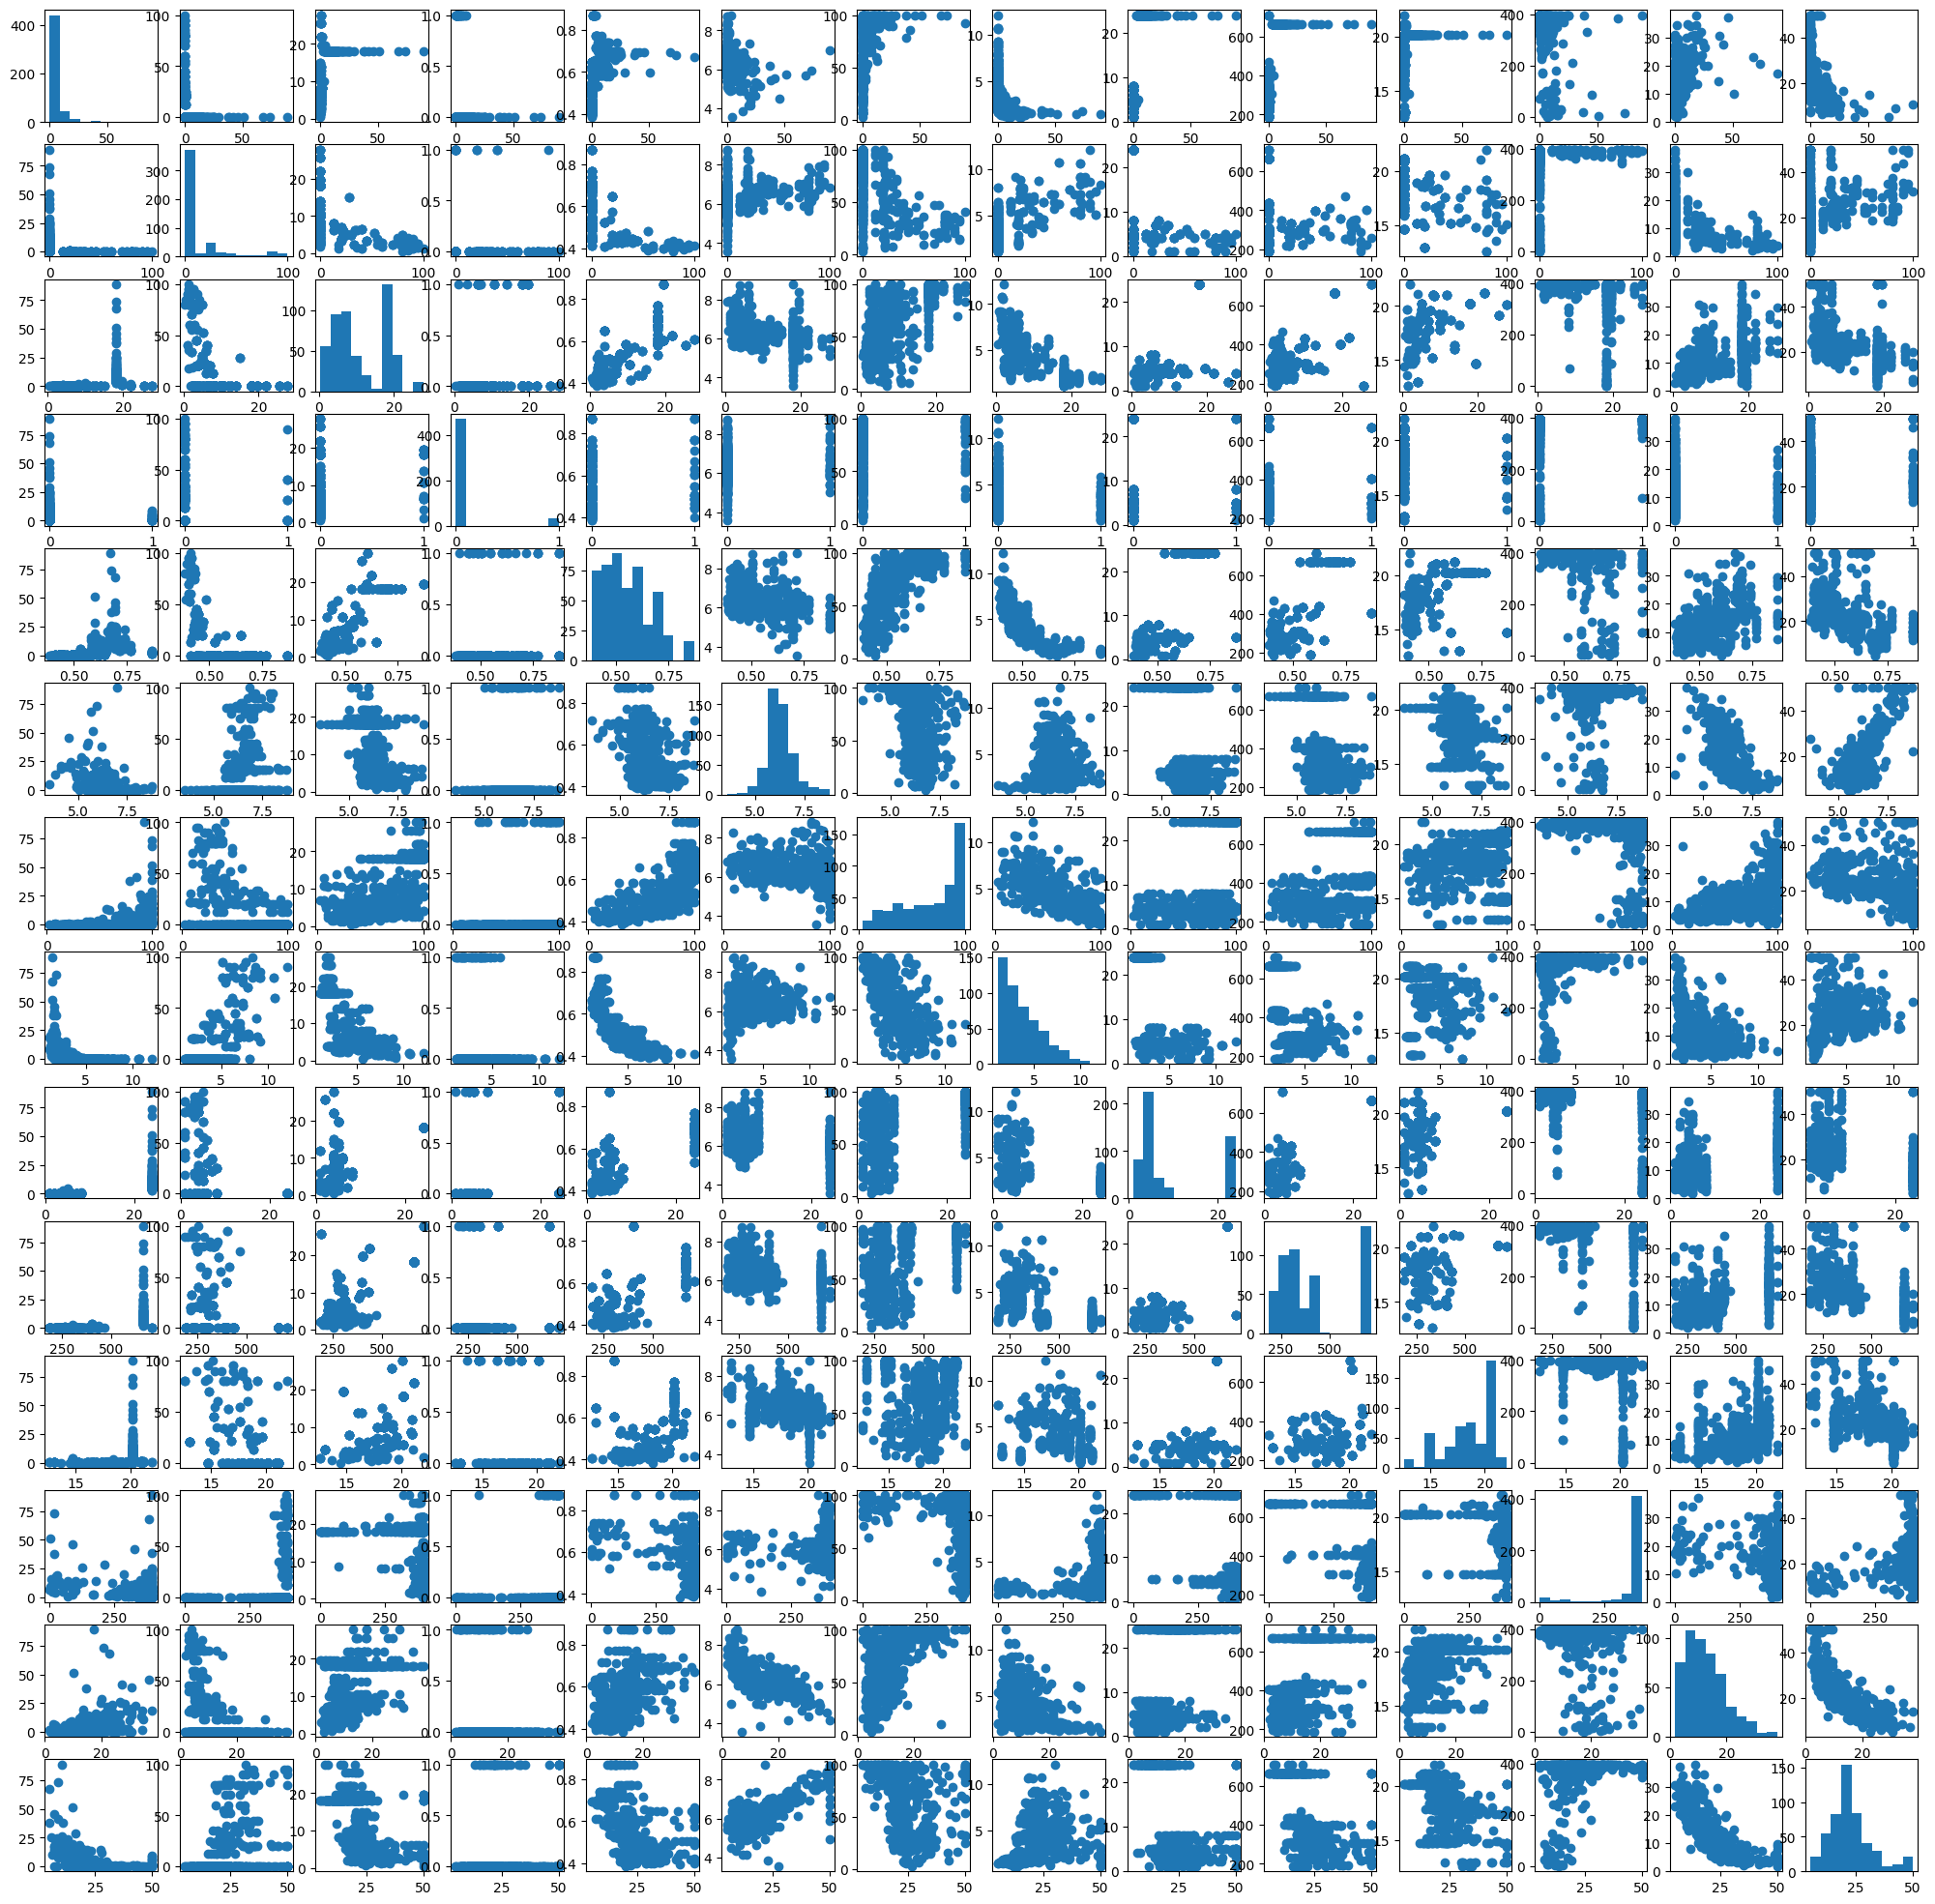

In [ ]:
# making a super plot with 14 by 14 subplot
fig, axs = plt.subplots(len(col_names), len(col_names), figsize=(25, 25))

# going throught the 14 by 14 subplots
for i in range(len(col_names)):
  for j in range(len(col_names)):
    # plot histogram if idential
    if i == j:
      axs[i,j].hist(dataset[col_names[i]])
    # plot the corelation if non-identical
    else:

  #   axs[0,j].set_title(column_names[j])
  # axs[i,0].set(ylabel=column_names[i])

plt.show()

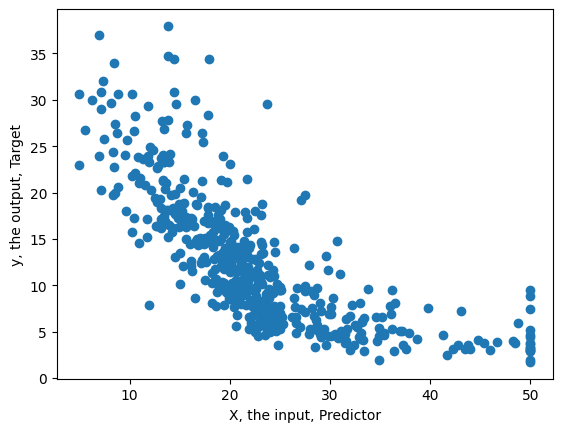

In [ ]:
# learn how to plot one variable against another variable
predictor = 'medv' #TODO: fill in a column name
target = 'lstat' #TODO: fill in a column name

X = np.array(dataset[predictor].tolist()).reshape(-1, 1)
y = np.array(dataset[target].tolist()).reshape(-1, 1)

plt.scatter(X, y)
plt.xlabel("X, the input, Predictor")
plt.ylabel("y, the output, Target")
plt.show()

- Guess a regression
> - change 2 variables: weight and bias to manualy fit a line
> - plot your guessed line
> - define 2 functions as metrics: R^2_score and MSE
> - calculate R^2 and MSE for your guessed line

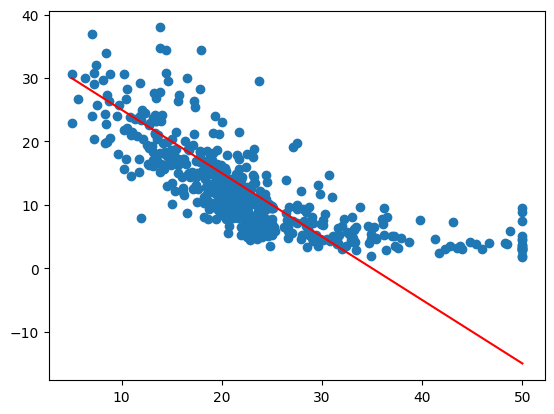

In [ ]:
weight = -1.0
bias = 35

lineStart_hand = X.min() * weight + bias
lineEnd_hand = X.max() * weight + bias
plt.scatter(X, y)
plt.plot([X.min(), X.max()], [lineStart_hand, lineEnd_hand], color = 'r')
plt.show()

In [ ]:
def reg_score(X, y, weight, bias):
  u_f = lambda X, y: (y - (X * weight + bias))**2
  u = u_f(X, y).sum(axis=0)
  v = ((y - y.mean()) ** 2).sum(axis=0)
  r = 1 - (u/v)
  return r

def mse(X, y, weight, bias):
    mse = np.power((X * weight + bias)-y, 2)
    mse = mse.sum(axis=0)
    return mse/X.shape[0]

print("R^2: ", reg_score(X, y, weight, bias).item())
print("MSE: ", mse(X, y, weight, bias))

R^2:  0.24068624405401662
MSE:  [38.64449862]


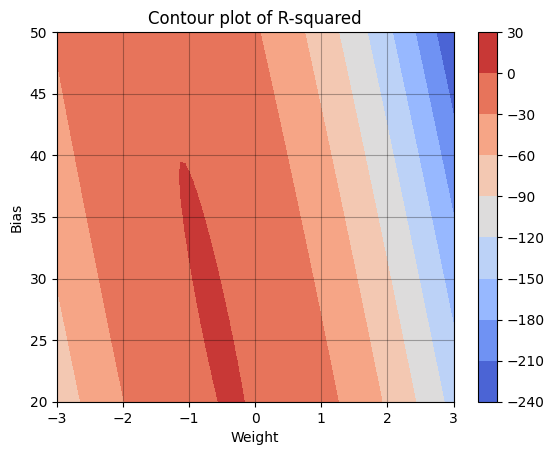

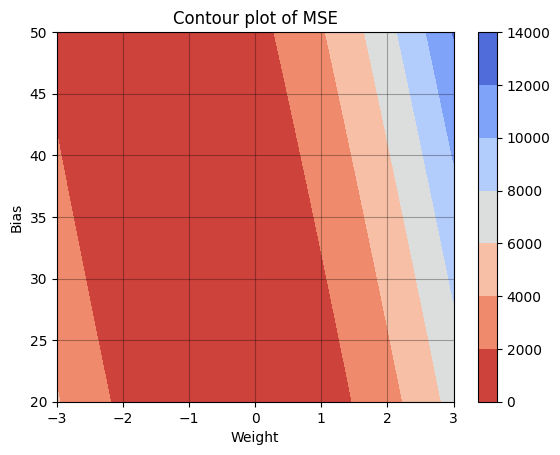

In [ ]:
def plot_contour(w_min, w_max, b_min, b_max, metric_function, title, resolution=100, cmap='coolwarm'):
  ws = np.linspace(w_min, w_max, resolution) #slope range
  bs = np.linspace(b_min, b_max, resolution) #intercept
  WS, BS = np.meshgrid(ws, bs)

  Z = metric_function(X, y, WS.flatten(), BS.flatten())

  fig, ax = plt.subplots()
  cs = ax.contourf(WS, BS, Z.reshape(WS.shape), cmap=cmap)
  ax.grid(c='k', ls='-', alpha=0.3)
  ax.set_title(title)
  ax.set_xlabel("Weight")
  ax.set_ylabel("Bias")
  plt.colorbar(cs)
  plt.show()

plot_contour(-3, 3, 20, 50, reg_score, 'Contour plot of R-squared')
plot_contour(-3, 3, 20, 50, mse, 'Contour plot of MSE', cmap='coolwarm_r')

In [ ]:

reg = LinearRegression().fit( X, y)
# The coefficients
print(f"Weight: {reg.coef_.item()} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_.item(), reg.intercept_.item()).item())


Weight: -0.572755820983477 ; Bias:25.558859226334413
with R^2 score:  0.5441462975864798  and MSE:  23.200208918044186


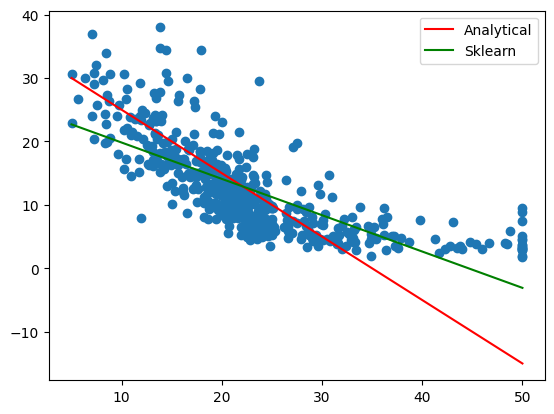

In [ ]:
lineStart = X.min() * reg.coef_[0] + reg.intercept_
lineEnd = X.max() * reg.coef_[0] + reg.intercept_

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.plot([X.min(), X.max()], [lineStart_hand, lineEnd_hand], color = 'r', label='Analytical')
ax.plot([X.min(), X.max()], [lineStart, lineEnd], color = 'g', label='Sklearn')
ax.legend()
plt.show()


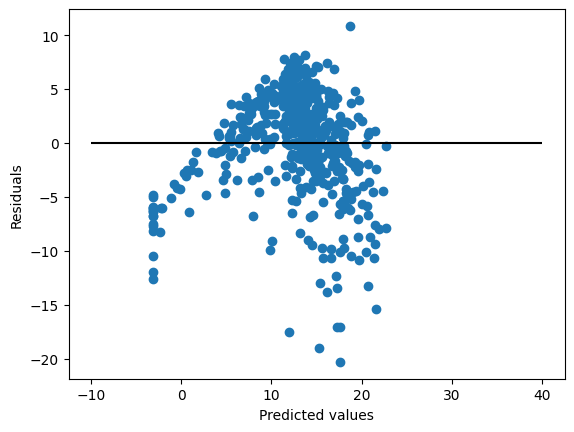

In [ ]:
pred = reg.predict(X)
plt.scatter(pred, pred - y)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.hlines(y=0, xmin=-10, xmax=40, color='black')
plt.show()



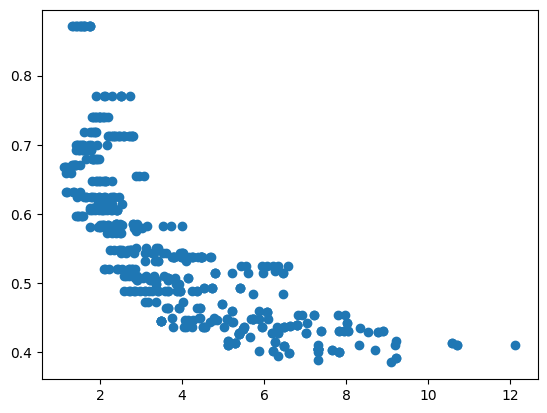

In [ ]:
X = np.array(dataset['dis'].tolist()).reshape(-1, 1)
y = np.array(dataset['nox'].tolist()).reshape(-1, 1)

plt.scatter(X, y)
plt.show()

In [ ]:
# to work with the multi dimmensional data we have to redefine the mse function
def mse(X, y, weight, bias):
    y = y.reshape(-1)
    mse_val = np.sum(X * weight, axis=1)
    mse_val = mse_val + bias
    mse_val = np.power(mse_val-y, 2)
    mse_val = mse_val.sum(axis=0)

    return mse_val/X.shape[0]

In [ ]:
# Your code goes here
reg = LinearRegression().fit( X, y)
print(f"Weight: {reg.coef_.item()} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_.item(), reg.intercept_.item()).item())


Weight: -0.04233089656877705 ; Bias:0.715342618777651
with R^2 score:  0.5917149670934201  and MSE:  0.005471468100729794


In [ ]:
degree = 2
poly = PolynomialFeatures(degree)
T = poly.fit_transform(X)
T = T[:,1:] # remove the first column as this is always 1

reg = LinearRegression().fit( T, y)
print(f"Weights: {reg.coef_[0]} ; Bias:{reg.intercept_.item()}")
print("with R^2 score: ", reg.score(T, y), " and MSE: ", mse(T, y, np.tile(reg.coef_[0], (len(T), 1)), reg.intercept_.item()))

Weights: [-0.1116276   0.00713503] ; Bias:0.8439910707412352
with R^2 score:  0.6998562064647851  and MSE:  0.004022256657974815


In [ ]:
input_columns = ['dis', 'lstat']
X = np.array(dataset[input_columns].values)
y = np.array(dataset['medv'].tolist()).reshape(-1, 1)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['medv'], mode='markers', marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    )))

fig.show()

In [ ]:
weights = [0.6, -1]
bias = 38

# greate a meshgrid to plot the decision plane
xs = np.linspace(X[:,0].min(), X[:,0].max(), 100)
ys = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xs, ys = np.meshgrid(xs, ys)

zs = xs * weights[0] + ys * weights[1] + bias

fig = go.Figure()
fig.add_surface(x=xs,y=ys,z=zs,showscale=False,showlegend=False, colorscale ='Reds')

fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['medv'], mode='markers', marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    )))

fig.show()

In [ ]:
print("with R^2 score: ", reg_score(X, y, weights, bias), " and MSE: ", mse(X, y, weights, bias))

with R^2 score:  [-3.67987736  0.44883291]  and MSE:  69.27638783823714


In [ ]:

reg = LinearRegression().fit( X, y)

# The coefficients
print(f"Coefficient: {reg.coef_[0]} ; Interceptor:{reg.intercept_}")
print("with R^2 score: ", reg.score(X, y), " and MSE: ", mse(X, y, reg.coef_, reg.intercept_.item()))

zs_model = xs * reg.coef_[0][0] + ys * reg.coef_[0][1] + reg.intercept_.item()

fig = go.Figure()
fig.add_surface(x=xs,y=ys,z=zs,showscale=False,showlegend=True, colorscale ='Reds', name='Analytical')
fig.add_surface(x=xs,y=ys,z=zs_model,showscale=False,showlegend=True, colorscale ='Greens', name= 'Model')

fig.add_trace(go.Scatter3d(x=dataset[input_columns[0]], y=dataset[input_columns[1]], z=dataset['medv'], mode='markers', marker=dict(
        size=4,
        color='blue',
        opacity=0.8
    ), name = 'Data'))

fig.show()

Coefficient: [-0.67683249 -1.04923978] ; Interceptor:[38.3775118]
with R^2 score:  0.5622284255429311  and MSE:  36.956482013451534


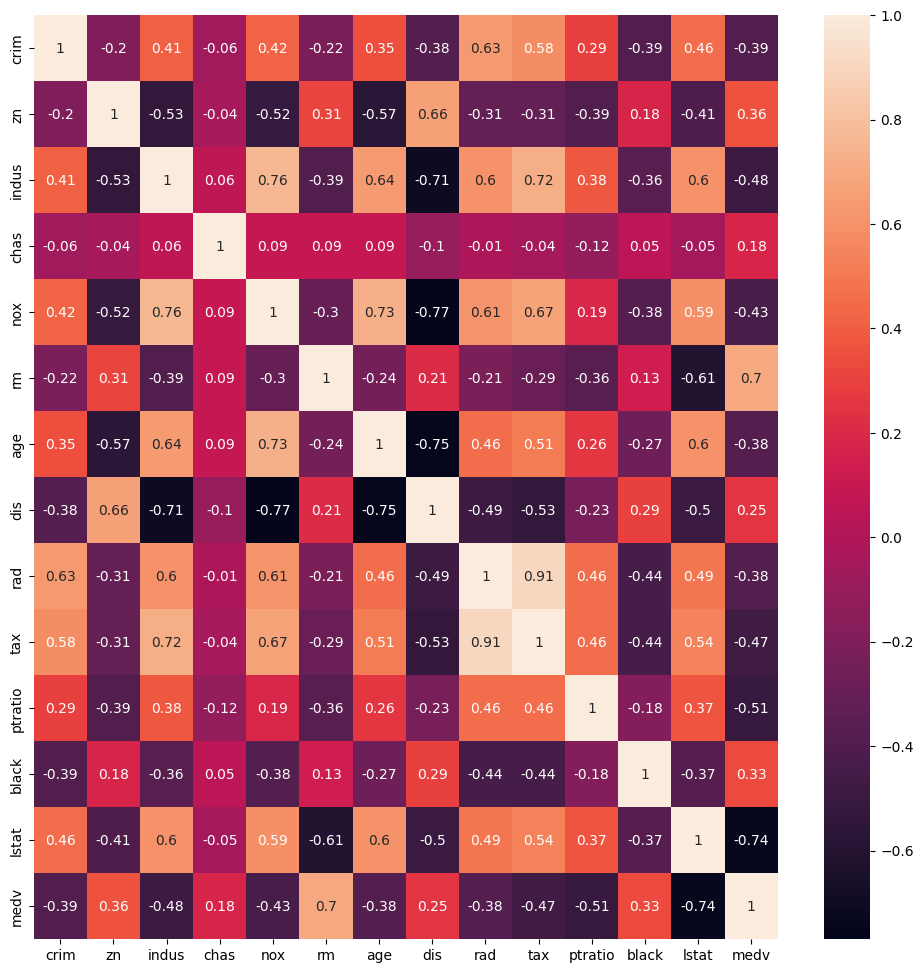

In [ ]:

import seaborn as sns
correlation_matrix = dataset.corr().round(2)
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)
plt.show()